# We will try to understand dataset using PCA.


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql3

#%matplotlib inline
%matplotlib inline

### Data loading from sqlite database

In [172]:
con = sql3.connect('database.sqlite')
df_pokemons= pd.read_sql('select * from Pokemon', con)

### Performing mean normalization and feature scaling with StandardScaler

In [173]:
from sklearn.preprocessing import StandardScaler
# Choosing features
features = ['maxhp', 'attack', 'defense', 'spatk', 'spdef', 'speed']

# Separating out the features
f_data = df_pokemons.loc[:, features].values

# Standardizing the features
f_data = StandardScaler().fit_transform(f_data)

C:\Users\EDSMAZIE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\EDSMAZIE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [174]:
print(f_data[:3])

[[ 6.18308258e-01 -6.57745312e-01 -1.81081247e-01 -5.57247361e-01
   1.28753959e-01  9.58156975e-01]
 [-6.20810334e-01 -1.15235542e+00 -9.10528116e-01 -1.09441613e+00
  -7.49591557e-01 -3.44683927e-01]
 [ 2.69466914e+00  1.01962808e+00  1.28046998e-03  1.26445540e+00
   3.62965360e-02  4.23061604e-01]]


### Performing PCA with 2 components

In [175]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(f_data)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

principal_df.head()

,principal component 1,principal component 2
0,0.120760,-0.643844
1,-1.992504,-0.323078
2,2.252610,-0.193148
3,2.414304,0.174365
4,1.282979,0.985245


# Data visualization

### Unlabeled data visualization

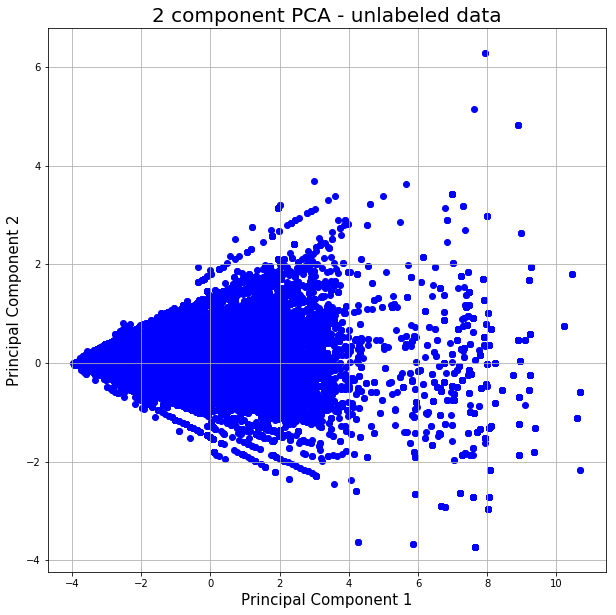

In [176]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - unlabeled data', fontsize = 20)

ax.scatter(principal_df['principal component 1'] , principal_df['principal component 2'], color = 'b')
ax.grid()

### Comments:
Visualization of unlabeled data shows a certain structure of points lying on set of straight lines, starting from (-4.0) and diverging radially towards positive PC1 values. 

The plot is symmetrical across the PC1 axis

Number of points decrease significantly after PC1 value reaches `4`.  

### Labeled data visualization - pokemon lvl aggregation

In [177]:
# Aggegation function

def pokemon_agg(x):
    if x >= 80:
        return 'lvl 80+'
    elif x >= 60:
        return 'lvl 60+'
    elif x >= 40:
        return 'lvl 40+'
    elif x >= 20:
        return 'lvl 20+'
    else:
        return 'lvl 20 -'

df_pokemons['agg_lvl'] = df_pokemons['pokelevel'].apply(pokemon_agg)
df_pokemons.head()

,trainerID,place,pokename,pokelevel,type1,type2,hp,maxhp,attack,defense,spatk,spdef,speed,agg_lvl
0,0,0,Smeargle,60,Normal,None,157,157,50,68,50,80,116,lvl 60+
1,1,0,Smeargle,30,Normal,None,83,83,27,36,27,42,60,lvl 20+
2,2,0,Wailord,57,Water,None,281,281,128,76,128,76,93,lvl 40+
3,2,1,Vileplume,57,Grass,Poison,173,173,116,122,150,128,82,lvl 40+
4,3,0,Armaldo,47,Rock,Bug,144,144,139,115,87,97,64,lvl 40+


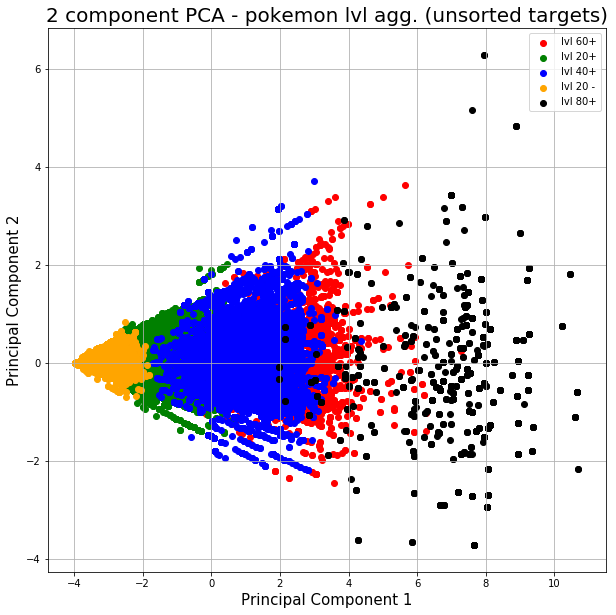

In [178]:
final_df = pd.concat([principal_df, df_pokemons['agg_lvl']], axis = 1)
targets = df_pokemons['agg_lvl'].unique().tolist()
colors = ['red', 'green', 'blue', 'orange','black']
targets_colors = zip(targets,colors)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - pokemon lvl agg. (unsorted targets)', fontsize = 20)

for target, color in targets_colors:
    indices = final_df['agg_lvl'] == target
    ax.scatter(final_df.loc[indices, 'principal component 1']
              , final_df.loc[indices, 'principal component 2'],
              c = color )
ax.grid()
ax.legend(targets)

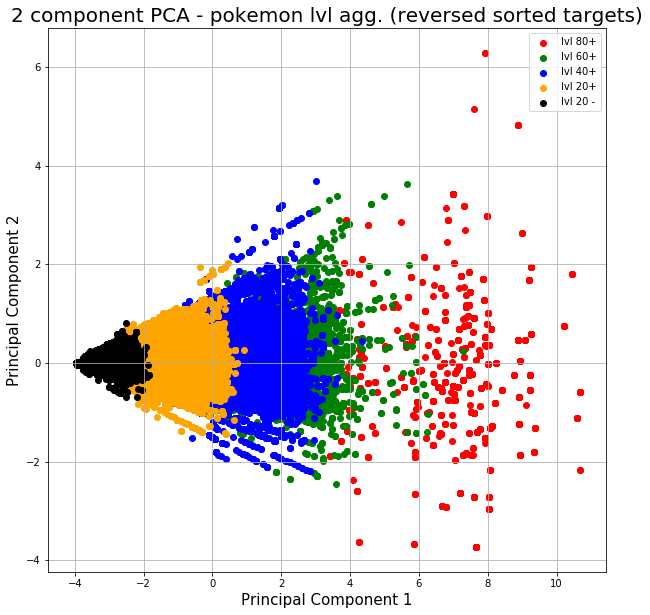

In [179]:
final_df = pd.concat([principal_df, df_pokemons['agg_lvl']], axis = 1)
targets = df_pokemons['agg_lvl'].unique().tolist()

colors = ['red', 'green', 'blue', 'orange','black']
targets.sort(reverse = True) # change in sorting place

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - pokemon lvl agg. (reversed sorted targets)', fontsize = 20)

for target, color in zip(targets,colors):
    indices = final_df['agg_lvl'] == target
    ax.scatter(final_df.loc[indices, 'principal component 1']
              , final_df.loc[indices, 'principal component 2']
              ,c = color)
ax.grid()
ax.legend(targets)

### Comments:
Visualization of data with aggregated pokemon levels shows circular sectors for different clusters of pokemons.

The higher pokemon lvl is, the further right the point is visualised.

### Labeled data visualization - pokemon main type

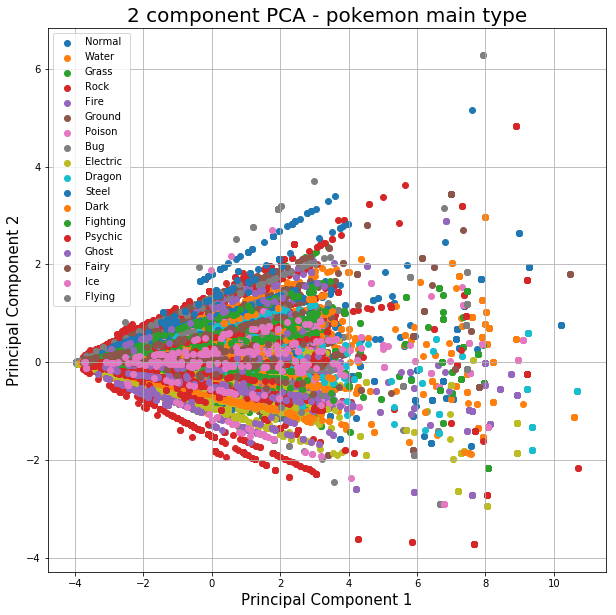

In [180]:
final_df = pd.concat([principal_df, df_pokemons['type1']], axis = 1)
targets = df_pokemons['type1'].unique().tolist()

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - pokemon main type', fontsize = 20)

for target in targets:
    indices = final_df['type1'] == target
    ax.scatter(final_df.loc[indices, 'principal component 1']
              , final_df.loc[indices, 'principal component 2'])
ax.grid()
ax.legend(targets)

### Comments:

It turns out straight lines are not grouped by pokemon type but probably only by pokemon species. Lets try to check it out.

### Labeled data visualization - chosen pokemon species

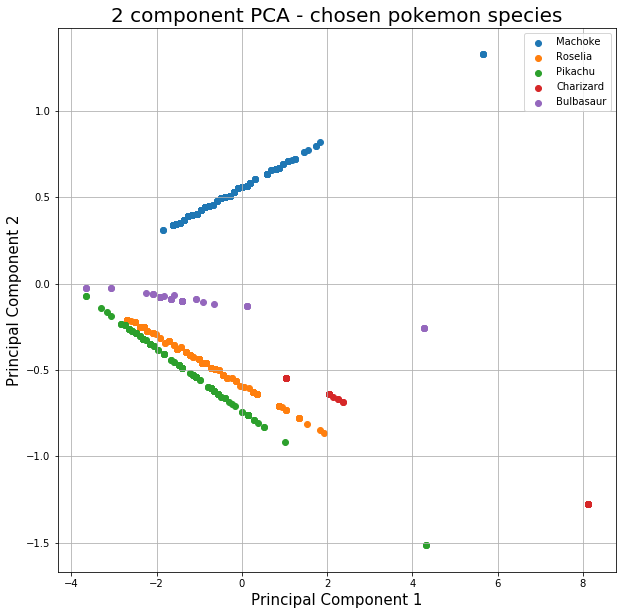

In [181]:
final_df = pd.concat([principal_df, df_pokemons['pokename']], axis = 1)
targets = ['Machoke', 'Roselia', 'Pikachu', 'Charizard', 'Bulbasaur']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - chosen pokemon species', fontsize = 20)

for target in targets:
    indices = final_df['pokename'] == target
    ax.scatter(final_df.loc[indices, 'principal component 1']
              , final_df.loc[indices, 'principal component 2'])
ax.grid()
ax.legend(targets)

### Conclusions:

- Straight lines are grouped by pokemon species. 
- The most pokemons are in cluster between lvl 40 and 60, the least amount of pokemons are in lvl 80+ cluster.
- The data is artificially created, because the points of each pokemon species lie on the same line.